<a href="https://colab.research.google.com/github/tinaghimire/AWS-ML-AI/blob/main/M2M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers datasets
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
from datasets import load_dataset, load_metric
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments

from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
from transformers import GenerationConfig

# GenerationConfig? # For beam search, and sampling- post-processing techniques

In [ ]:

# generated_config = GenerationConfig(
#     max_length = 200,
#     early_stopping = True,
#     num_beams = 5,
# )

In [ ]:
model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M", src_lang="en", tgt_lang="ne")
# , src_lang="en", tgt_lang="np"

In [ ]:
# dataset = load_dataset("csv", data_files="/content/drive/MyDrive/Major/Dataset_combined.csv")
dataset = pd.read_csv("/content/drive/MyDrive/Major/Text_dataset/Dataset_New_combined.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset = dataset[1:51][['Input', 'Output']]
dataset

,Input,Output
1,Make a creative post for Dashain 2077,२०७७ को दशैंको उपलक्षमा हाम्रा सम्पूर्ण ग्राहक...
2,Design a banner for Dashain greetings for 2074,"२०७४ को दशैंको अवसरमा समृद्धिको आशामा, स्वास्थ..."
3,Create a happy Dashain wish for 2076,"२०७६ को दशैंको उपलक्षमा स्वास्थ्य, समृद्धि र ख..."
4,Make a Dashain greetings post for 2072,२०७२ को दशैंमा खुशी र समृद्धिको आशाको हार्दिक ...
5,Design a card to wish Dashain 2071,२०७१ को दशैंको उपलक्षमा हाम्रो सम्पूर्ण ग्राहक...
6,Generate a poster to wish happy Dashain 2070,२०७० को दशैंमा हाम्रो सबैको भाग्य र समृद्धिको ...
7,Create a greeting for Dashain 2069,"२०६९ को दशैंको अवसरमा समृद्धि, स्वास्थ्य र आनन..."
8,Make a Dashain card for 2074,"२०७४ को दशैंमा आनन्द, समृद्धि र खुशीको साथ हार..."
9,Create a Dashain message for 2071,२०७१ को दशैंको अवसरमा हाम्रो सम्पूर्ण ग्राहक र...
10,Generate Dashain wishes for 2075,"२०७५ को दशैंको अवसरमा समृद्धि, स्वास्थ्य र आनन..."


In [ ]:
train_df, temp_df = train_test_split(dataset, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
from datasets import load_dataset, DatasetDict, Dataset

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Combine into a DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

In [ ]:
def preprocess_function(examples):
    inputs = examples['Input']
    targets = examples['Output']

    # Tokenize inputs and targets
    model_inputs = tokenizer(inputs, max_length=128, padding=True, truncation=True, return_tensors="pt")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, padding=True, truncation=True, return_tensors="pt")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
dataset['test'][1]

{'Input': 'Generate a Dashain card for 2076',
 'Output': '२०७६ को दशैंमा हाम्रो सबैको भाग्य र समृद्धिको आशाको साथ शुभकामना!',
 '__index_level_0__': 18}

In [ ]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Input', 'Output', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14
    })
    validation: Dataset({
        features: ['Input', 'Output', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3
    })
    test: Dataset({
        features: ['Input', 'Output', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3
    })
})

In [ ]:
Seq2SeqTrainingArguments?

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/drive/MyDrive/Major/M2M/output",
    logging_dir="/content/drive/MyDrive/Major/M2M/logs",
    overwrite_output_dir=True,
    do_train=True,
    do_eval=True,
    # do_predict=True,
    eval_strategy="epoch",  # Evaluate after each epoch
    logging_strategy="epoch",       # Log metrics after each epoch
    logging_first_step=True,
    logging_nan_inf_filter=True,
    save_strategy="epoch",          # Save checkpoint after each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=1, # Default to 8
    per_device_eval_batch_size=1,
    weight_decay=0.01,
    save_total_limit=1,             # Limit total number of checkpoints to save
    num_train_epochs=2,
    restore_callback_states_from_checkpoint=True, # Restores callback states from the checkpoint if they exist
    # lr_scheduler_type="cosine",
    # lr_scheduler_kwargs = None,
    # warmup_ratio=0.1, # Ratio of total training steps used for a linear warmup from 0 to `learning_rate`.
    report_to="none",
    predict_with_generate=True,
    dataloader_drop_last=True,
    load_best_model_at_end=True, # Load the best model at the end of training
    metric_for_best_model="eval_loss",
    ignore_data_skip=False,             # Ensures training resumes with aligned data loading
    greater_is_better=False, # eval_loss smaller is better
    fp16=True,                   # Enable if you're using compatible hardware
)

In [ ]:
!pip install sacrebleu
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=f39d645839b558b82919bf297742267dcab50b48ef31f5160d4d9f464d5136ae
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from datasets import load_metric
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
bleu = []

bleu_metric = load_metric("sacrebleu")
# rouge_metric = load_metric("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # precision = precision_score(decoded_preds, decoded_labels, average='weighted')
    # recall = recall_score(decoded_preds, decoded_labels, average='weighted')
    # f1 = f1_score(decoded_preds, decoded_labels, average='weighted')

    # print(f"Predictions length: {len(predictions)}, Labels length: {len(labels)}")
    # print(f"Example prediction: {predictions[0]}, Example label: {labels[0]}")
    # print(f"Decoded prediction: {decoded_preds[0]}, Decoded label: {decoded_labels[0]}")

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [[label.strip()] for label in decoded_labels]
    # perplexity = model.compute_perplexity(decoded_preds, decoded_labels)

    bleu_result = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    # rouge_result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
    print(f"BLEU score: {bleu_result}")
    bleu.append(bleu_result["score"])

    # print(f"ROUGE score: {rouge_result}")

    # result = {"bleu": bleu_result["score"], "rouge1": rouge_result["rouge1"].mid.fmeasure, "rouge2": rouge_result["rouge2"].mid.fmeasure, "rougeL": rouge_result["rougeL"].mid.fmeasure}
    # result = {"bleu": bleu_result["score"], "precision": precision, "recall": recall, "f1 score": f1}
    result = {"bleu": bleu_result["score"]}

    return result

In [ ]:
from transformers import TrainerState
from transformers.trainer_callback import TrainerCallback

In [ ]:
Seq2SeqTrainer?

In [ ]:
from transformers import TrainerCallback

class LossLoggerCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if state.is_world_process_zero:
            if logs is not None:
                if "loss" in logs:
                    self.train_losses.append(logs["loss"])
                    print(f"Training Loss: {logs['loss']}")
                if "eval_loss" in logs:
                    self.eval_losses.append(logs["eval_loss"])
                    print(f"Validation Loss: {logs['eval_loss']}")

    def on_epoch_end(self, args, state, control, **kwargs):
        print(f"Epoch {state.epoch} ended")
        print(f"Training Losses: {self.train_losses}")
        print(f"Validation Losses: {self.eval_losses}")

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[LossLoggerCallback()],
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Bleu
1,1.817100,1.655464,45.518722
2,1.779700,1.633126,36.769512


Training Loss: 0.001
Epoch 1.0 ended
Training Losses: [0.001]
Validation Losses: []
Training Loss: 1.8171
BLEU score: {'score': 45.518721928009775, 'counts': [29, 21, 15, 11], 'totals': [36, 33, 30, 27], 'precisions': [80.55555555555556, 63.63636363636363, 50.0, 40.74074074074074], 'bp': 0.800737402916808, 'sys_len': 36, 'ref_len': 44}
Validation Loss: 1.6554635763168335


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200, 'early_stopping': True, 'num_beams': 5}


Epoch 2.0 ended
Training Losses: [0.001, 1.8171]
Validation Losses: [1.6554635763168335]
Training Loss: 1.7797
BLEU score: {'score': 36.76951181103786, 'counts': [29, 19, 11, 7], 'totals': [38, 35, 32, 29], 'precisions': [76.3157894736842, 54.285714285714285, 34.375, 24.137931034482758], 'bp': 0.8539396656235351, 'sys_len': 38, 'ref_len': 44}
Validation Loss: 1.633125901222229


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200, 'early_stopping': True, 'num_beams': 5}
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=28, training_loss=1.7335452025456886, metrics={'train_runtime': 255.6927, 'train_samples_per_second': 0.11, 'train_steps_per_second': 0.11, 'total_flos': 829594730496.0, 'train_loss': 1.7335452025456886, 'epoch': 2.0})

In [ ]:
loss_callback = next(callback for callback in trainer.callback_handler.callbacks if isinstance(callback, LossLoggerCallback))

# Print the collected losses
print("Training Losses:", loss_callback.train_losses)
print("Validation Losses:", loss_callback.eval_losses)
# print("Validation Losses:", trainer.callback_handler.callbacks[0].eval_losses)
print("BLEU:", bleu)

Training Losses: [0.001, 1.8171, 1.7797]
Validation Losses: [1.6554635763168335, 1.633125901222229]
BLEU: [18.994545918147573, 12.808547630818783, 20.854227525285904, 37.98320173806048, 10.640084179960782, 30.72326264729707, 45.518721928009775, 36.76951181103786]


In [ ]:
eval_losses.remove(0.0000)
eval_losses

[0.0, 1.6554635763168335, 1.633125901222229]

In [ ]:
from datetime import datetime

# Get the current date
current_date = datetime.now().date()
print("Current Date:", current_date)

# Get the current time
current_time = datetime.now().time()
current_time = current_time.strftime("%H:%M:%S")
print("Current Time:", current_time)

Current Date: 2024-06-30
Current Time: 09:26:25


In [ ]:
import os

path = f"/content/drive/MyDrive/Major/M2M/result_{current_date}/result_{accuracy_score}"

In [ ]:
import matplotlib.pyplot as plt

plot_path = os.path.join(path, "loss_plot.png")

train_losses = loss_callback.train_losses
eval_losses = loss_callback.eval_losses
# eval_losses.insert(0, 0.0000)

# Assuming the logging happens at the end of each epoch
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, eval_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.savefig(plot_path)
plt.show()

NameError: name 'loss_callback' is not defined

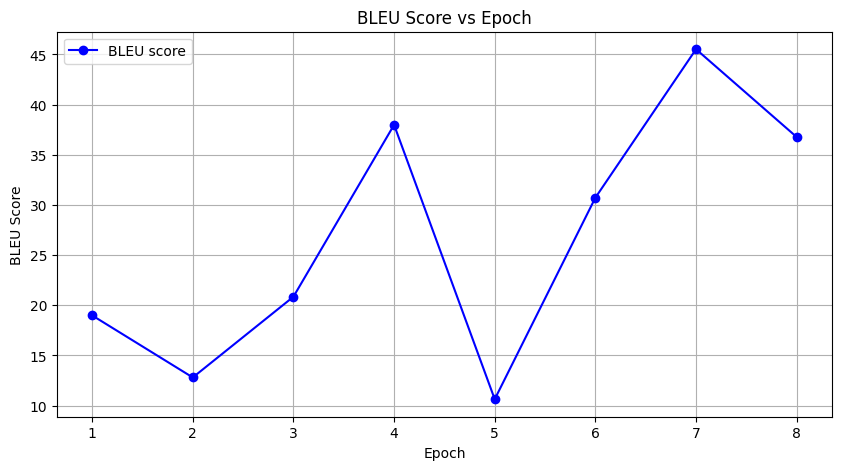

In [ ]:
epochs = range(1, len(bleu) + 1)

plot_path = os.path.join(path, "bleu_score.png")

plt.figure(figsize=(10, 5))
plt.plot(epochs, bleu, marker='o', linestyle='-', color='b', label='BLEU score')
plt.title('BLEU Score vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
plt.xticks(epochs)
plt.legend()
plt.savefig(plot_path)
plt.show()

In [ ]:
results = trainer.evaluate()
print(results)

results['BLEU score']

NameError: name 'trainer' is not defined

In [ ]:
test_results = trainer.evaluate(tokenized_dataset["test"])
print(test_results)

BLEU score: {'score': 8.29135701118309, 'counts': [18, 8, 1, 0], 'totals': [38, 35, 32, 29], 'precisions': [47.36842105263158, 22.857142857142858, 3.125, 1.7241379310344827], 'bp': 0.9487294800164372, 'sys_len': 38, 'ref_len': 40}
{'eval_loss': 1.8591318130493164, 'eval_bleu': 8.29135701118309, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1 score': 0.0, 'eval_runtime': 2.4791, 'eval_samples_per_second': 1.21, 'eval_steps_per_second': 1.21, 'epoch': 2.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# bleu = [1,2]
# train_loss = [3, 4]
# eval_loss = [5, 6]

In [ ]:
with open("/content/drive/MyDrive/Major/M2M/data.json", "r") as f:
    score_dict = json.load(f)

# score_dict
last_epoch = score_dict["epoch"][-1]
bleu = [1,2]
train_losses = [3, 4]
eval_losses = [5, 6]
epoch = [i for i in range(last_epoch + 1, last_epoch + 1 + len(bleu))]

# Append new values to the existing lists
score_dict["epoch"].extend(epoch)
score_dict["bleu"].extend(bleu)
score_dict["train_loss"].extend(train_loss)
score_dict["eval_loss"].extend(eval_loss)

print(score_dict)

{'epoch': [1, 2, 3, 4, 5, 6], 'bleu': [1, 2, 1, 2, 1, 2], 'train_loss': [3, 4, 3, 4, 3, 4], 'eval_loss': [5, 6, 5, 6, 5, 6]}


In [ ]:
import numpy as np
import json

last_epoch = 0
# last_epoch = score_dict["epoch"][-1]
# bleu = [1,2]
# train_losses = [3, 4]
# eval_losses = [5, 6]
# epoch = [i for i in range(last_epoch + 1, last_epoch + 1 + len(bleu))]

# score_dict = {"epoch": epoch, "bleu": bleu, "train_loss": train_losses, "eval_loss": eval_losses}

# Saving to a file
with open('/content/drive/MyDrive/Major/M2M/data.json', 'w') as json_file:
    json.dump(score_dict, json_file)

print("Score saved to 'data.json' file.")

Score saved to 'data.json' file.
